In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
tipdf= pd.read_csv('../data/tips.csv')
tipdf

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [3]:
# 1. 마지막라인에 누락데이타 추가하고 마지막 데이타 3개만 추출
tipdf.loc[245] = np.nan
tipdf[243:246]

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.0,Female,No,Thur,Dinner,2.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN
245,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 2. tipdf 의 차원을 조회하세요
#np.ndim(tipdf)
tipdf.ndim

2

In [5]:
# 3.tipdf의 크기를 조회하세요(행, 열)
#np.shape(tipdf)
tipdf.shape

(246, 7)

In [6]:
# 4. 조회함수
tipdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [7]:
# 5. 가장 팁이 높은 데이터 3개의 정보를 구하세요
tipdf.sort_values(by=['tip'], ascending=False).head(3)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0


In [8]:
# 6. 음식총비용지불액 대비 팁의 비율을 리턴하는 함수를 정의 get_tippct(df)
# 소수점 2자리까지 나오도록 합니다.
def get_tippct(df):
    return round(df['tip']/df['total_bill'] * 100,2)

get_tippct(tipdf)

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
241     8.82
242     9.82
243    15.97
244      NaN
245      NaN
Length: 246, dtype: float64

In [9]:
# 7. 위에서 구한 총음식비용에 대한 팁비율을 새로운 컬럼으로 추가합니다.
#  컬럼명은 tip_pct
#

tipdf['tip_pct'] = get_tippct(tipdf)

tipdf

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2.0,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.68
...,...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2.0,9.82
243,18.78,3.00,Female,No,Thur,Dinner,2.0,15.97
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# 8. 성별, 팁비율별로 정렬하여 팁 비율이 높은 정보 3개 출력

tipdf.sort_values(['sex','tip_pct'], ascending=[False,False]).head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2.0,71.03
232,11.61,3.39,Male,No,Sat,Dinner,2.0,29.20
183,23.17,6.50,Male,Yes,Sun,Dinner,4.0,28.05


In [12]:
# 9. male 정보를 따로 분리해서 크기 정보 조회
tipdf_man = tipdf[tipdf['sex'].isin(['Male'])]
tipdf_man
tipdf_man.shape

(157, 8)

In [13]:
# 10. Female 정보를 따로 분리해서 크기 정보 조회
tipdf_Female = tipdf[tipdf['sex'].isin(['Female'])]
tipdf_Female.shape
#tipdf_Female

(87, 8)

In [14]:
# 11. tipdf_man, tipdf_Female 데이타를 상하로 병합
# 이때 데이타의 출처를 Male, Female로 구분한다
tip_all = pd.concat([tipdf_man, tipdf_Female], keys=['Male','Female'])

tip_all

total_bill   tip     sex smoker   day    time  size  tip_pct
Male   1         10.34  1.66    Male     No   Sun  Dinner   3.0    16.05
       2         21.01  3.50    Male     No   Sun  Dinner   3.0    16.66
       3         23.68  3.31    Male     No   Sun  Dinner   2.0    13.98
       5         25.29  4.71    Male     No   Sun  Dinner   4.0    18.62
       6          8.77  2.00    Male     No   Sun  Dinner   2.0    22.81
...                ...   ...     ...    ...   ...     ...   ...      ...
Female 226       10.09  2.00  Female    Yes   Fri   Lunch   2.0    19.82
       229       22.12  2.88  Female    Yes   Sat  Dinner   2.0    13.02
       238       35.83  4.67  Female     No   Sat  Dinner   3.0    13.03
       240       27.18  2.00  Female    Yes   Sat  Dinner   2.0     7.36
       243       18.78  3.00  Female     No  Thur  Dinner   2.0    15.97

[244 rows x 8 columns]

In [15]:
# 12. 각 row별 na값 갯수 count
#tipdf.isnull().sum(axis=1)
tipdf.isna().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
241    0
242    0
243    0
244    7
245    8
Length: 246, dtype: int64

In [16]:
# 13. na값 포함된 row 삭제 -- how='any'--- dropna(how='any')

tipdf.dropna()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2.0,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.68
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2.0,9.82


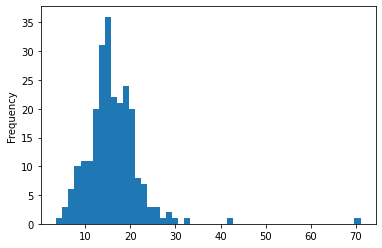

In [17]:
# 14. tips_pct 컬럼에 대한 시각화 이때 그래프의 종류는 팁의 빈도수를 알수 있도록 hist로 하자
# plot(kind='hist')

tipdf['tip_pct'].plot(kind='hist', bins=50)
plt.show()